## Setup

In [1]:
# Required Libraries
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install tensorflow

In [3]:
# Loading Data
file_id1 = '1fljI_Nl36uD10qfS8E767enMjMxHnBQ-'
url1 = f'https://drive.google.com/uc?id={file_id1}'
output1 = 'carclaims.csv'
gdown.download(url1, output1, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1fljI_Nl36uD10qfS8E767enMjMxHnBQ-
To: /content/carclaims.csv
100%|██████████| 3.69M/3.69M [00:00<00:00, 179MB/s]


'carclaims.csv'

In [4]:
# Putting data into df
data_path = "/content/carclaims.csv"
df = pd.read_csv(data_path)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


## Section A: Exploratory Data Analysis

In [5]:
df.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days:Policy-Accident    object
Days:Policy-Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange-Claim     object
NumberOfCars            object
Year                     int64
BasePolicy              object
FraudFou

In [6]:
## Summary Statistics
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


Cateogorical data types need transformation into a numerical data type in order to be reflected in summary statistics.


*   The average age of policy holders is 40 while the median is 38- this shows that age is not being skewed significantly.
*   The minimum age is 0, which is likely a data error.
*   The deductible has a mean of 407.70 and a median of 400- this shows that the deductible is not being skewed significantly.
*   What's interesting is that both the 25th percentile and the 75th percentile of the deductible is also 400. This shows that a large portion of policies have the same deductible of 400.
*   The average driver rating of policy holders is 2.49 while the median is 2- this shows that there are more drivers with driver ratings in higher ranges that are skewing the average.



### Visualisations


In [8]:
## Data Visualization

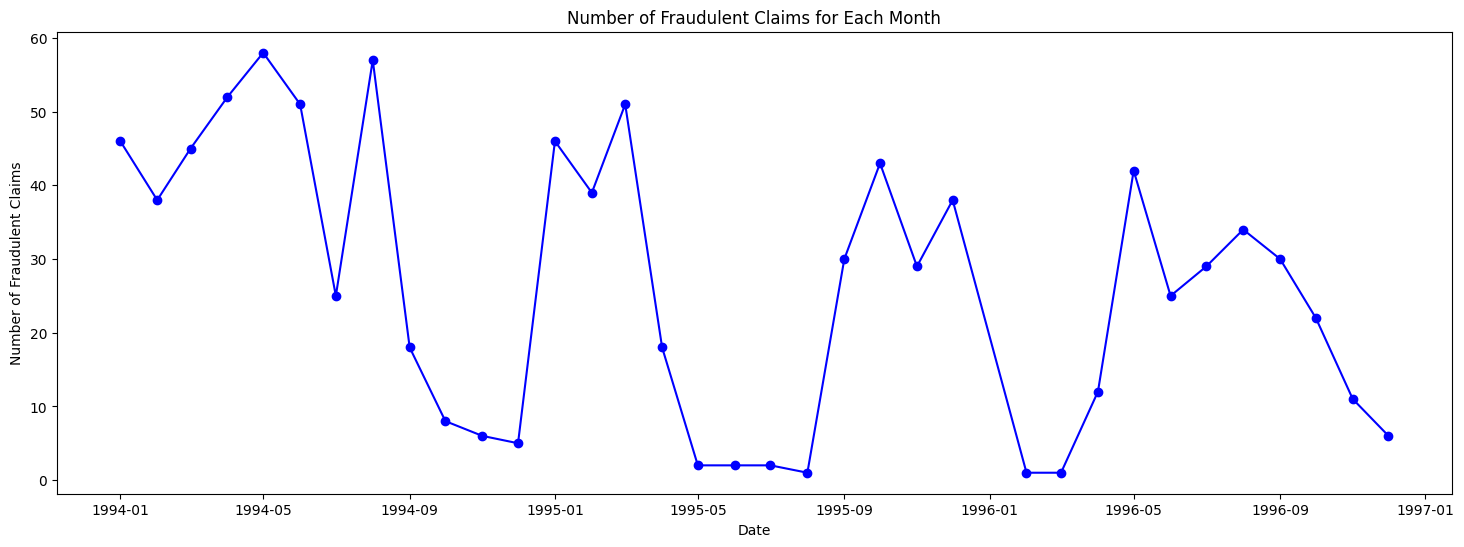

In [9]:
fraudulent_claims = df[df['FraudFound'] == 'Yes']

fraudulent_claims_by_month = fraudulent_claims.groupby(['Year', 'MonthClaimed']).size().reset_index(name='count')

fraudulent_claims_by_month['date'] = pd.to_datetime(fraudulent_claims_by_month['Year'].astype(str) + '-' +
                                                      fraudulent_claims_by_month['MonthClaimed'].astype(str) + '-01')

monthly_fraud_counts = fraudulent_claims_by_month.groupby('date')['count'].sum().reset_index()

plt.figure(figsize=(18, 6))
plt.plot(monthly_fraud_counts['date'], monthly_fraud_counts['count'], marker='o', color='b')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Claims')
plt.title('Number of Fraudulent Claims for Each Month')

plt.show()

*The* graph shows the trend of fraudulent claims across the entire timeframe.

Data Visualisation for categorical variables are presented below.

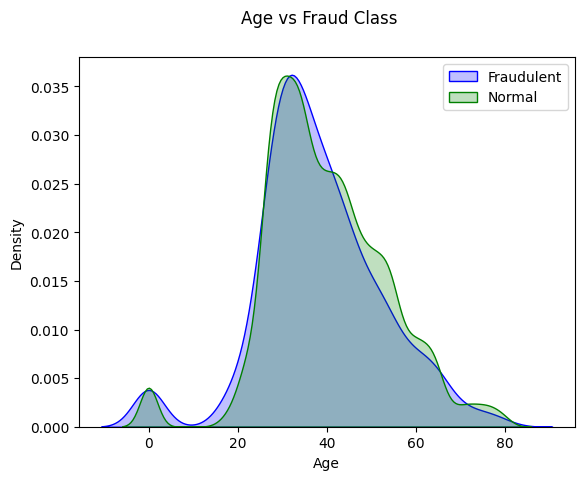

In [10]:
## Data Distribution
fig, ax = plt.subplots()

sns.kdeplot(df[df["FraudFound"]=='Yes']["Age"], fill=True, color="blue", label="Fraudulent", ax=ax)
sns.kdeplot(df[df["FraudFound"]=='No']["Age"], fill=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs Fraud Class")
plt.legend()
plt.show()

Both fraudulent and normal classes show similar distributions but fraudelent class shows a smoother line.

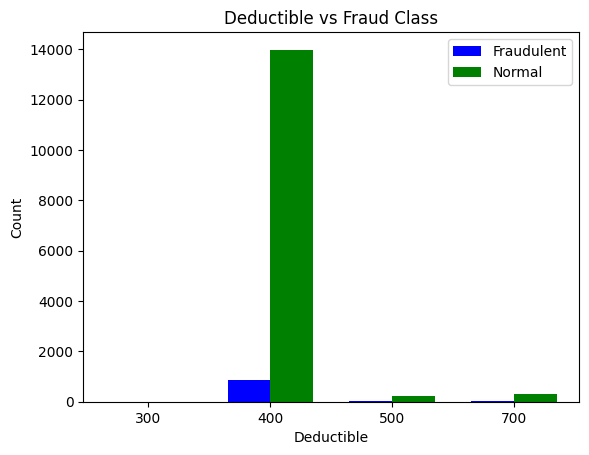

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your data
fraudulent_data = df[df["FraudFound"] == 'Yes']
normal_data = df[df["FraudFound"] == 'No']

# Combine and reindex the data to ensure both classes have the same Deductible values
combined_data = pd.concat([fraudulent_data, normal_data])
combined_data = combined_data.pivot_table(index="Deductible", columns="FraudFound", aggfunc='size', fill_value=0)

# Create a grouped bar plot
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(combined_data))

fraudulent_counts = combined_data["Yes"]
normal_counts = combined_data["No"]

plt.bar(index, fraudulent_counts, bar_width, label="Fraudulent", color="blue")
plt.bar([i + bar_width for i in index], normal_counts, bar_width, label="Normal", color="green")

ax.set_xlabel("Deductible")
ax.set_ylabel("Count")
ax.set_title("Deductible vs Fraud Class")
plt.xticks([i + bar_width / 2 for i in index], combined_data.index)

plt.legend()
plt.show()

Both fraudulent and normal classes show similar distributions but normal class shows a significantly higher probability of being in the 400 range.

### Missing / Outliers

In [12]:
## Missing Data
# Num of missing values in descending order

df.isnull().sum().sort_values(ascending=False)

Month                   0
Deductible              0
BasePolicy              0
Year                    0
NumberOfCars            0
AddressChange-Claim     0
NumberOfSuppliments     0
AgentType               0
WitnessPresent          0
PoliceReportFiled       0
AgeOfPolicyHolder       0
AgeOfVehicle            0
PastNumberOfClaims      0
Days:Policy-Claim       0
Days:Policy-Accident    0
DriverRating            0
RepNumber               0
WeekOfMonth             0
PolicyNumber            0
VehiclePrice            0
VehicleCategory         0
PolicyType              0
Fault                   0
Age                     0
MaritalStatus           0
Sex                     0
WeekOfMonthClaimed      0
MonthClaimed            0
DayOfWeekClaimed        0
AccidentArea            0
Make                    0
DayOfWeek               0
FraudFound              0
dtype: int64

There are no missing values in any feature.

In [13]:
## Outliers
def count_outliers(x):
    numerical_cols = x.select_dtypes(include=['number'])
    outlier_counts = {}

    for col in numerical_cols:
        Q1 = x[col].quantile(0.25)
        Q3 = x[col].quantile(0.75)
        IQR = Q3 - Q1
        threshold = 1.5

        outliers = x[(x[col] < Q1 - threshold * IQR) | (x[col] > Q3 + threshold * IQR)]
        num_outliers = len(outliers)
        outlier_counts[col] = num_outliers

    return outlier_counts

outlier_counts = count_outliers(df)

# Print the number of outliers per feature
for feature, count in outlier_counts.items():
    print(f"Feature: {feature}, Number of Outliers: {count}")


Feature: WeekOfMonth, Number of Outliers: 0
Feature: WeekOfMonthClaimed, Number of Outliers: 0
Feature: Age, Number of Outliers: 547
Feature: PolicyNumber, Number of Outliers: 0
Feature: RepNumber, Number of Outliers: 0
Feature: Deductible, Number of Outliers: 582
Feature: DriverRating, Number of Outliers: 0
Feature: Year, Number of Outliers: 0


In [14]:
df['Age'].unique()

array([21, 34, 47, 65, 27, 20, 36,  0, 30, 42, 71, 52, 28, 61, 38, 41, 32,
       40, 63, 31, 45, 60, 39, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48,
       64, 33, 74, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 69,
       67, 19, 78, 77, 75, 80, 58, 73, 24, 76, 62, 79, 70, 17, 66])

In [15]:
df['Deductible'].unique()

array([300, 400, 500, 700])

Age (other than 0) and Deductible values are reasonable, thus we will not be removing outliers as the outliers may contain important information for fraud analysis that could be indicative of fraudulent activities.

The value 0 for age will be replaced with the mean age, rounded to the nearest whole number.

In [16]:
# calculate mean age
mean_age = df[df['Age'] > 0]['Age'].mean()

# Replace age = 0 values with the mean age, rounded to nearest whole number #41 i think
df['Age'] = df['Age'].replace(0, round(mean_age))

### Visualisations II

**Categorical Variables**



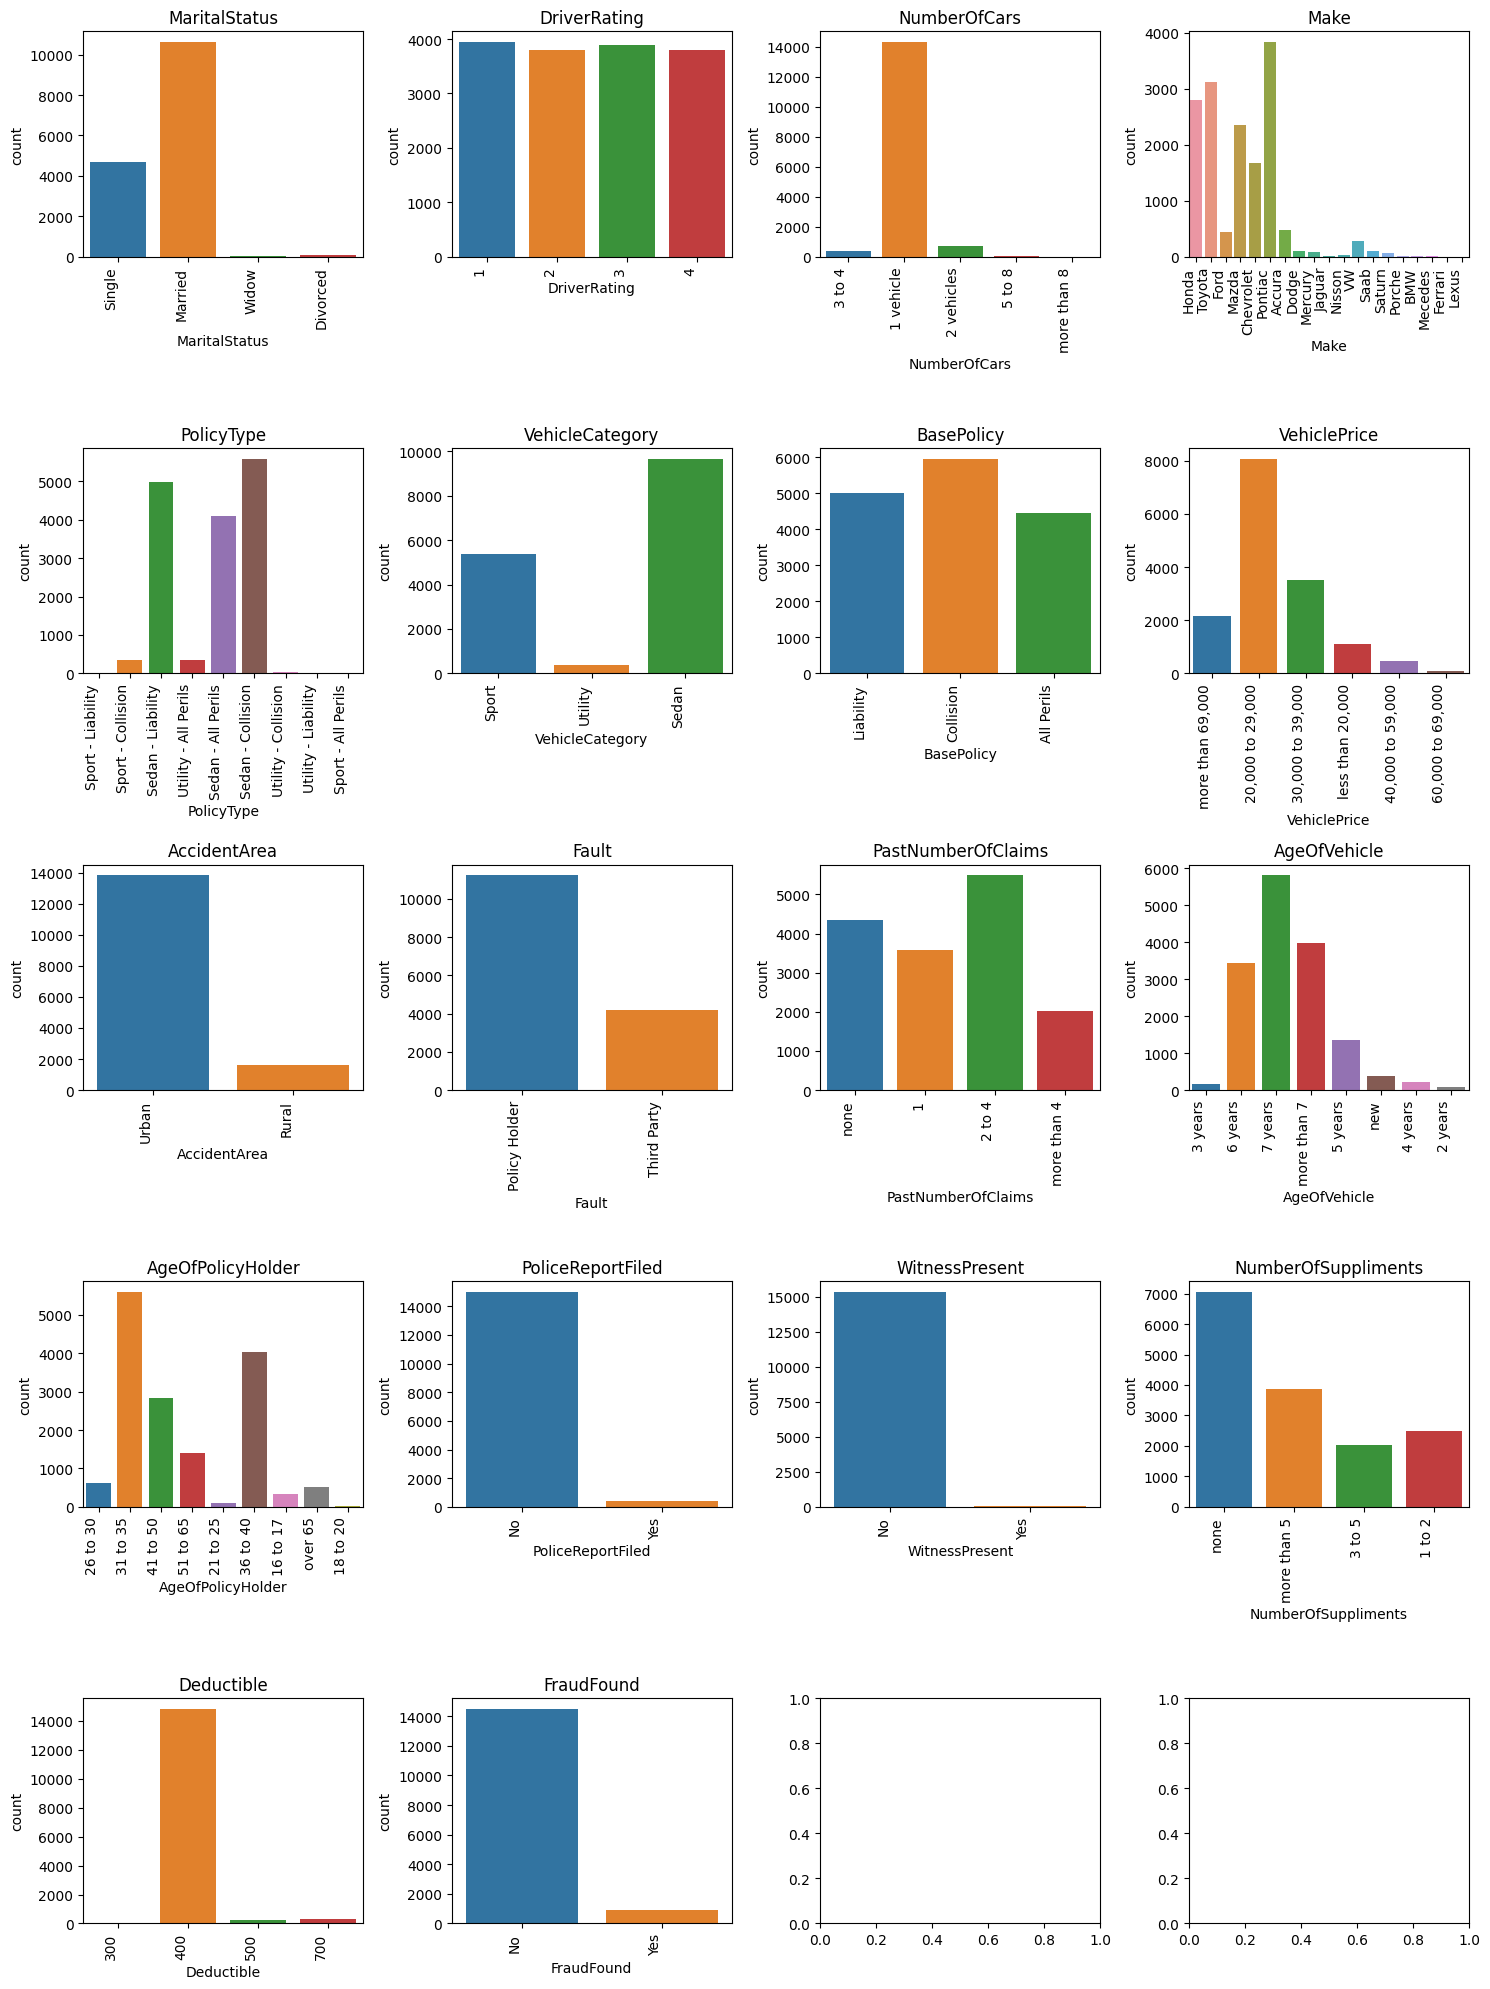

In [17]:
## Overview of categories for categorical variables

features = ['MaritalStatus', 'DriverRating', 'NumberOfCars', 'Make',
            'PolicyType', 'VehicleCategory', 'BasePolicy', 'VehiclePrice',
            'AccidentArea', 'Fault', 'PastNumberOfClaims', 'AgeOfVehicle',
            'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'NumberOfSuppliments',
            'Deductible', 'FraudFound']

df_count = df[features]

num_variables = len(df_count.columns)
num_cols = 4
num_rows = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

axes = axes.flatten()

for i, col in enumerate(df_count.columns):
    sns.countplot(x=col, data=df_count, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, horizontalalignment='right')

plt.tight_layout()
plt.show()

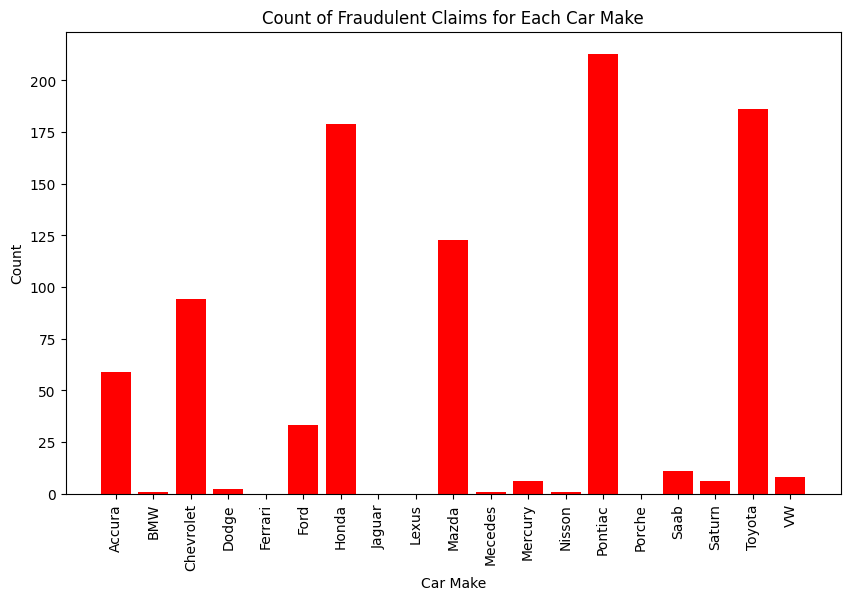

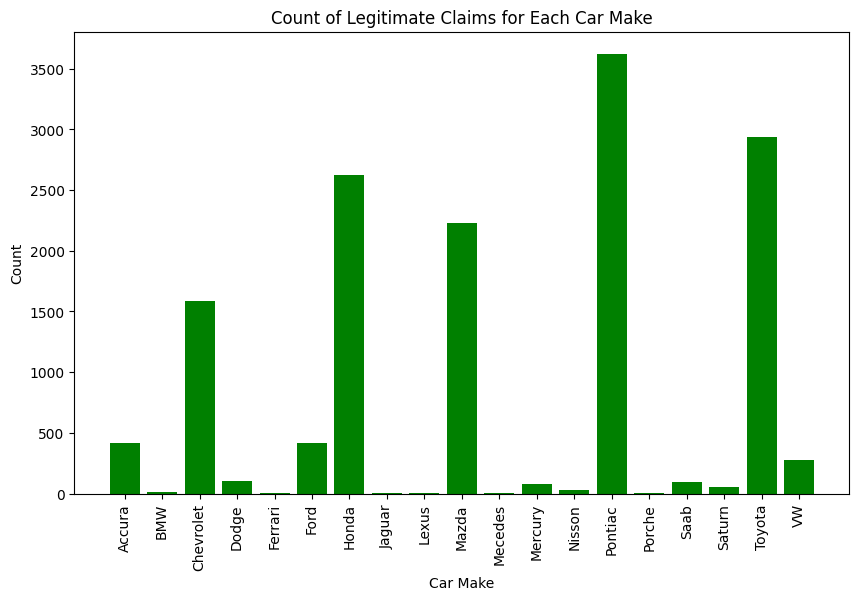

In [18]:
# count of fraud by car make
fraud_by_make = df.groupby(['Make', 'FraudFound']).size().unstack()

fraud_yes = fraud_by_make['Yes'].reset_index()
fraud_no = fraud_by_make['No'].reset_index()

plt.figure(figsize=(10, 6))
plt.bar(fraud_yes['Make'], fraud_yes['Yes'], color='red')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.title('Count of Fraudulent Claims for Each Car Make')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(fraud_no['Make'], fraud_no['No'], color='green')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.title('Count of Legitimate Claims for Each Car Make')
plt.xticks(rotation='vertical')
plt.show()

Pontiac, Toyota and Honda are the most common car makes of fraudulent claims

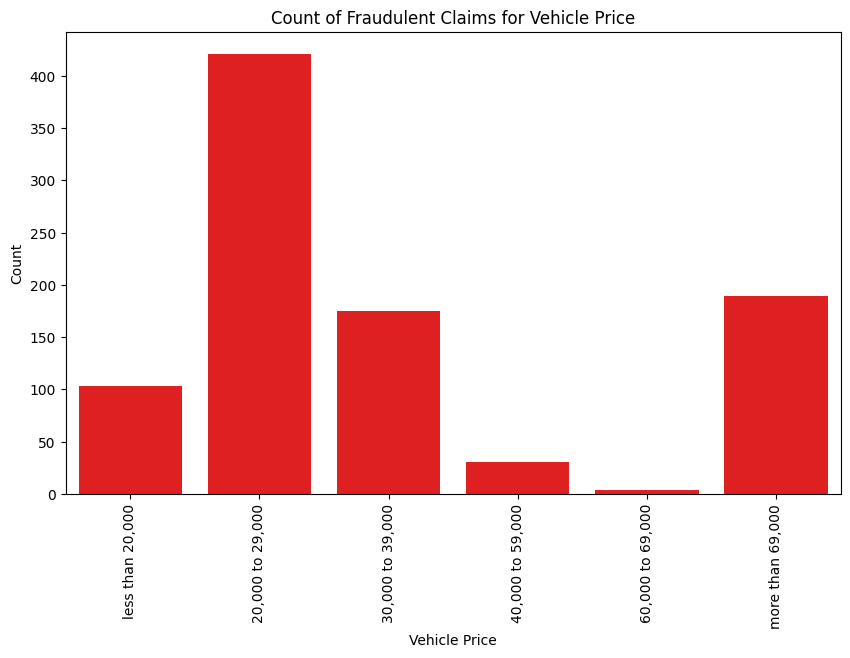

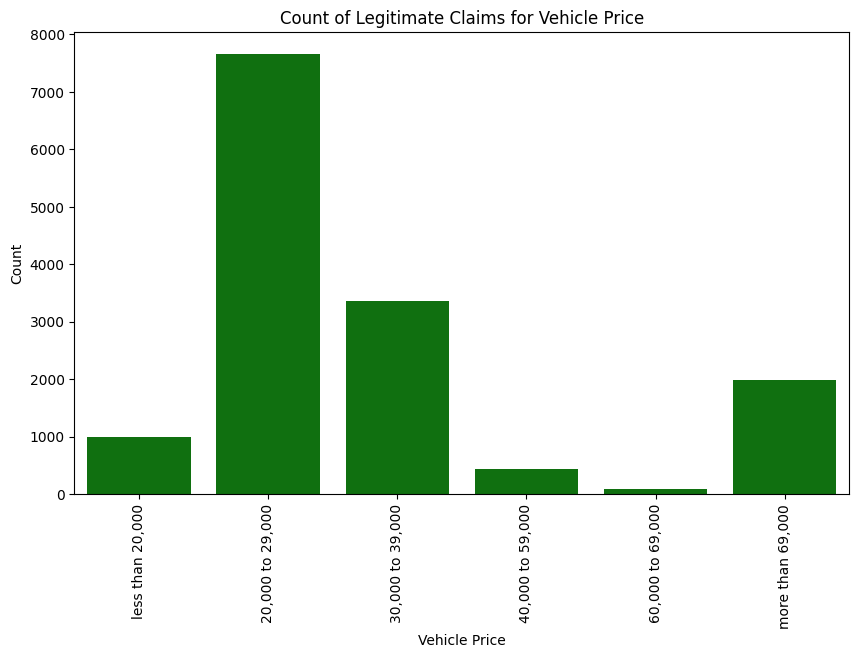

In [19]:
# count of fraud by vehicle price
fraud_by_price = df.groupby(['VehiclePrice', 'FraudFound']).size().unstack()
order = ['less than 20,000', '20,000 to 29,000', '30,000 to 39,000', '40,000 to 59,000', '60,000 to 69,000', 'more than 69,000']

fraud_yes = fraud_by_price['Yes'].reset_index()
fraud_no = fraud_by_price['No'].reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='VehiclePrice', y='Yes', data=fraud_yes, order=order, color='red')
plt.xlabel('Vehicle Price')
plt.ylabel('Count')
plt.title('Count of Fraudulent Claims for Vehicle Price')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='VehiclePrice', y='No', data=fraud_no, order=order, color='green')
plt.xlabel('Vehicle Price')
plt.ylabel('Count')
plt.title('Count of Legitimate Claims for Vehicle Price')
plt.xticks(rotation='vertical')
plt.show()

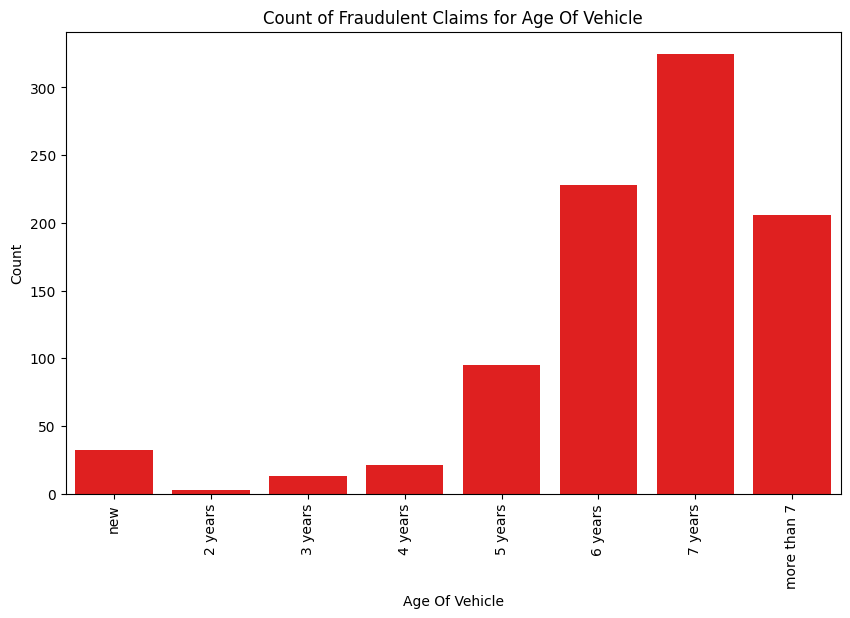

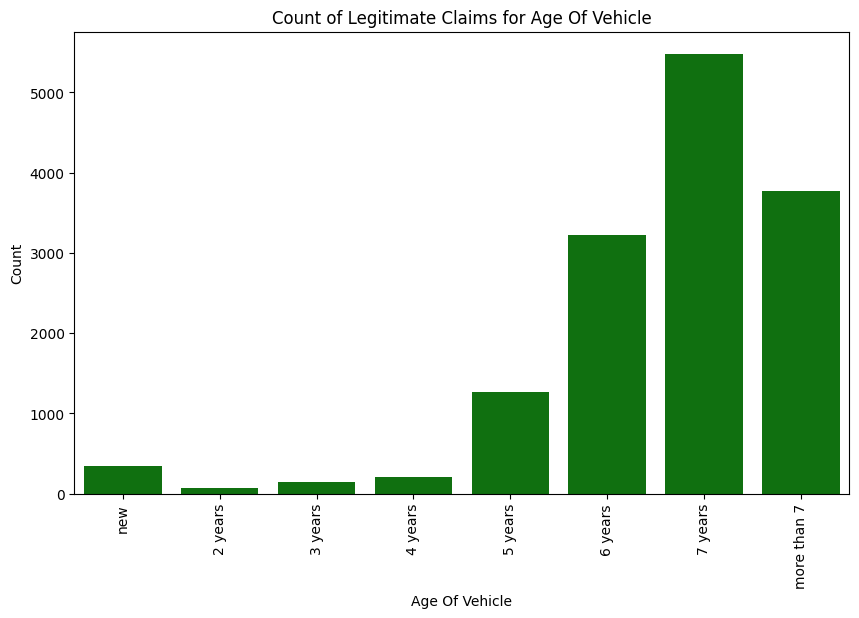

In [20]:
# count of fraud by age of vehicle
fraud_by_age = df.groupby(['AgeOfVehicle', 'FraudFound']).size().unstack()
order = ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7']

fraud_yes = fraud_by_age['Yes'].reset_index()
fraud_no = fraud_by_age['No'].reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='AgeOfVehicle', y='Yes', data=fraud_yes, order=order, color='red')
plt.xlabel('Age Of Vehicle')
plt.ylabel('Count')
plt.title('Count of Fraudulent Claims for Age Of Vehicle')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='AgeOfVehicle', y='No', data=fraud_no, order=order, color='green')
plt.xlabel('Age Of Vehicle')
plt.ylabel('Count')
plt.title('Count of Legitimate Claims for Age Of Vehicle')
plt.xticks(rotation='vertical')
plt.show()

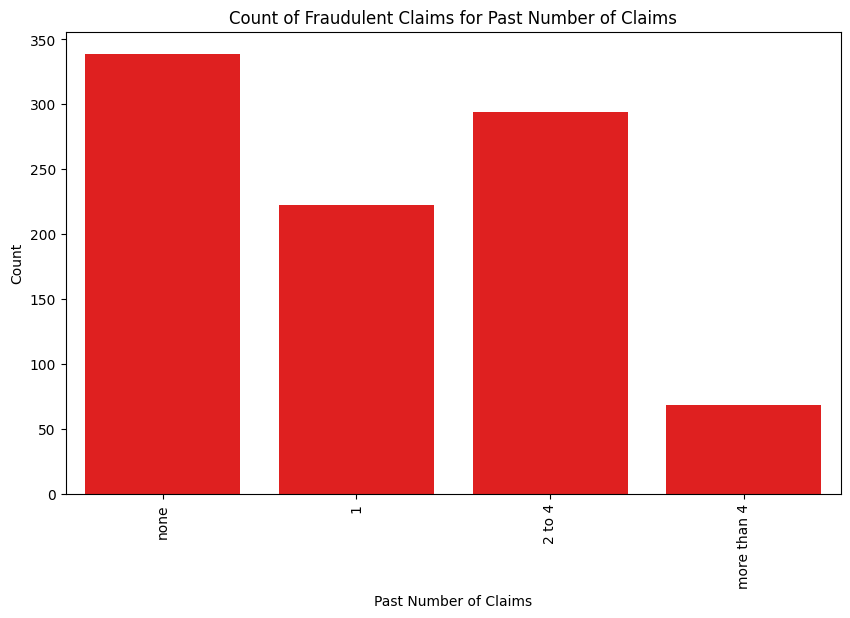

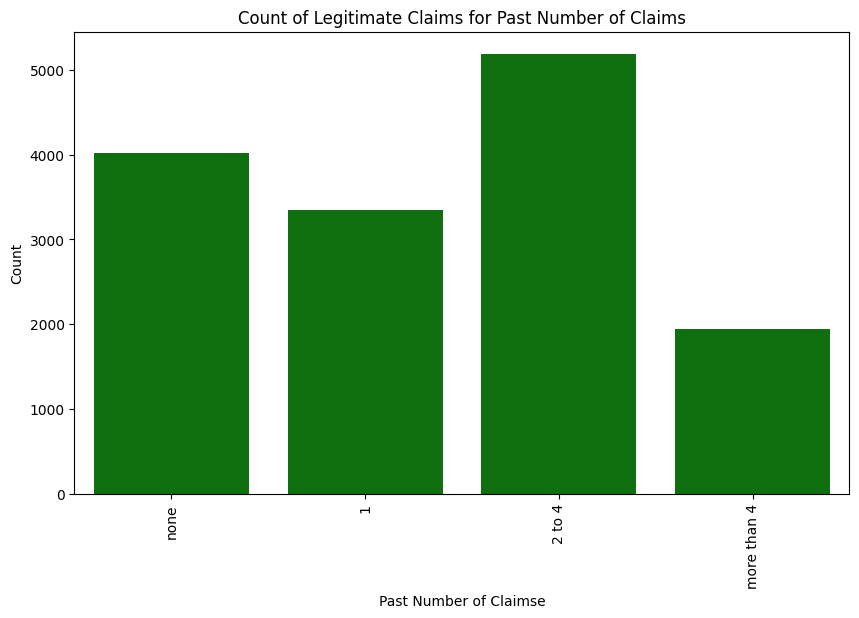

In [21]:
# count of fraud by past number of claims
fraud_by_numclaims = df.groupby(['PastNumberOfClaims', 'FraudFound']).size().unstack()
order = ['none', '1', '2 to 4', 'more than 4']

fraud_yes = fraud_by_numclaims['Yes'].reset_index()
fraud_no = fraud_by_numclaims['No'].reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='PastNumberOfClaims', y='Yes', data=fraud_yes, order=order, color='red')
plt.xlabel('Past Number of Claims')
plt.ylabel('Count')
plt.title('Count of Fraudulent Claims for Past Number of Claims')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='PastNumberOfClaims', y='No', data=fraud_no, order=order, color='green')
plt.xlabel('Past Number of Claimse')
plt.ylabel('Count')
plt.title('Count of Legitimate Claims for Past Number of Claims')
plt.xticks(rotation='vertical')
plt.show()

### Feature Engineering

In [22]:
! pip install category_encoders
! pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 6.8 MB/s eta 0:00:00


In [23]:
import prince
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

#### Simple Data Cleaning

In [31]:
df_dr = df.copy()

cols_to_drop = ['PolicyNumber', 'PolicyType', 'WeekOfMonth', 'DayOfWeek', 'WeekOfMonthClaimed', 'DayOfWeekClaimed']
df1 = df_dr.drop(columns=cols_to_drop)

In [32]:
df1

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,Honda,Urban,Jan,Female,Single,21,Policy Holder,Sport,"more than 69,000",...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,Honda,Urban,Jan,Male,Single,34,Policy Holder,Sport,"more than 69,000",...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,Honda,Urban,Nov,Male,Married,47,Policy Holder,Sport,"more than 69,000",...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,Toyota,Rural,Jul,Male,Married,65,Third Party,Sport,"20,000 to 29,000",...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,Honda,Urban,Feb,Female,Single,27,Third Party,Sport,"more than 69,000",...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Toyota,Urban,Nov,Male,Married,35,Policy Holder,Sedan,"20,000 to 29,000",...,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15416,Nov,Pontiac,Urban,Dec,Male,Married,30,Policy Holder,Sport,"30,000 to 39,000",...,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No
15417,Nov,Toyota,Rural,Dec,Male,Single,24,Policy Holder,Sedan,"20,000 to 29,000",...,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15418,Dec,Toyota,Urban,Dec,Female,Married,34,Third Party,Sedan,"20,000 to 29,000",...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,No


#### Data Preparation
* Decide which features should be Binary Encoded, One-Hot Encoded (OHE), Label Encoded and which should be Count Encoded (CE)
* Ordinal features will be Label Encoded to preserve its order information.
* Nominal features will be Binary, One Hot or Count Encoded depending on its cardinality.
* A threshold $N$ will be defined to determine the specific encoding.
* $N$ represents the cardinality of a column
* **IF** cardinality of a column == 2, we apply binary encoding, ≤ $N$, we will apply OHE, else CE

In [33]:
vehicle_price = {'less than 20,000': 0, '20,000 to 29,000': 1, '30,000 to 39,000': 2,
                 '40,000 to 59,000': 3, '60,000 to 69,000': 4, 'more than 69,000': 5}
df1['VehiclePrice'] = df1['VehiclePrice'].map(vehicle_price)

days_policy = {'none': 0, '1 to 7': 1, '8 to 15': 2, '15 to 30': 3, 'more than 30': 4}
df1['Days:Policy-Accident'] = df1['Days:Policy-Accident'].map(days_policy)
df1['Days:Policy-Claim'] = df1['Days:Policy-Claim'].map(days_policy)

past_num_claims = {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3}
df1['PastNumberOfClaims'] = df1['PastNumberOfClaims'].map(past_num_claims)

age_of_vehicle = {'new': 0, '2 years': 1, '3 years': 2, '4 years': 3, '5 years': 4,
                  '6 years': 5, '7 years': 6, 'more than 7': 7}
df1['AgeOfVehicle'] = df1['AgeOfVehicle'].map(age_of_vehicle)

age_of_policyholder = {'16 to 17': 0, '18 to 20': 1, '21 to 25': 2, '26 to 30': 3,
                       '31 to 35': 4, '36 to 40': 5, '41 to 50': 6, '51 to 65':7 , 'over 65': 8}
df1['AgeOfPolicyHolder'] = df1['AgeOfPolicyHolder'].map(age_of_policyholder)

suppliments = {'none': 0, '1 to 2': 1, '3 to 5': 2, 'more than 5': 3}
df1['NumberOfSuppliments'] = df1['NumberOfSuppliments'].map(suppliments)

address_change = {'no change': 0, 'under 6 months': 1, '1 year': 2, '2 to 3 years': 3, '4 to 8 years': 4}
df1['AddressChange-Claim'] = df1['AddressChange-Claim'].map(address_change)

num_of_cars = {'1 vehicle': 0, '2 vehicles': 1, '3 to 4': 2, '5 to 8': 3, 'more than 8': 4}
df1['NumberOfCars'] = df1['NumberOfCars'].map(num_of_cars)

months = {'Jan': 0, 'Feb': 1, 'Mar': 2, 'Apr': 3, 'May': 4, 'Jun': 5,
               'Jul': 6, 'Aug': 7, 'Sep': 8, 'Oct': 9, 'Nov': 10, 'Dec': 11}
df1['Month'] = df1['Month'].map(months)
df1['MonthClaimed'] = df1['MonthClaimed'].map(months)

deductible = {300: 0, 400: 1, 500: 2, 700: 3}
df1['Deductible'] = df1['Deductible'].map(deductible)

In [34]:
df1

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,11,Honda,Urban,0.0,Female,Single,21,Policy Holder,Sport,5,...,3,No,No,External,0,2,2,1994,Liability,No
1,0,Honda,Urban,0.0,Male,Single,34,Policy Holder,Sport,5,...,4,Yes,No,External,0,0,0,1994,Collision,No
2,9,Honda,Urban,10.0,Male,Married,47,Policy Holder,Sport,5,...,6,No,No,External,0,0,0,1994,Collision,No
3,5,Toyota,Rural,6.0,Male,Married,65,Third Party,Sport,1,...,7,Yes,No,External,3,0,0,1994,Liability,No
4,0,Honda,Urban,1.0,Female,Single,27,Third Party,Sport,5,...,4,No,No,External,0,0,0,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,10,Toyota,Urban,10.0,Male,Married,35,Policy Holder,Sedan,1,...,4,No,No,External,0,0,0,1996,Collision,Yes
15416,10,Pontiac,Urban,11.0,Male,Married,30,Policy Holder,Sport,2,...,4,No,No,External,3,0,2,1996,Liability,No
15417,10,Toyota,Rural,11.0,Male,Single,24,Policy Holder,Sedan,1,...,3,No,No,External,1,0,0,1996,Collision,Yes
15418,11,Toyota,Urban,11.0,Female,Married,34,Third Party,Sedan,1,...,4,No,No,External,3,0,0,1996,All Perils,No


In [35]:
df1 = df1.dropna()

In [36]:
df1

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,VehicleCategory,VehiclePrice,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,11,Honda,Urban,0.0,Female,Single,21,Policy Holder,Sport,5,...,3,No,No,External,0,2,2,1994,Liability,No
1,0,Honda,Urban,0.0,Male,Single,34,Policy Holder,Sport,5,...,4,Yes,No,External,0,0,0,1994,Collision,No
2,9,Honda,Urban,10.0,Male,Married,47,Policy Holder,Sport,5,...,6,No,No,External,0,0,0,1994,Collision,No
3,5,Toyota,Rural,6.0,Male,Married,65,Third Party,Sport,1,...,7,Yes,No,External,3,0,0,1994,Liability,No
4,0,Honda,Urban,1.0,Female,Single,27,Third Party,Sport,5,...,4,No,No,External,0,0,0,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,10,Toyota,Urban,10.0,Male,Married,35,Policy Holder,Sedan,1,...,4,No,No,External,0,0,0,1996,Collision,Yes
15416,10,Pontiac,Urban,11.0,Male,Married,30,Policy Holder,Sport,2,...,4,No,No,External,3,0,2,1996,Liability,No
15417,10,Toyota,Rural,11.0,Male,Single,24,Policy Holder,Sedan,1,...,3,No,No,External,1,0,0,1996,Collision,Yes
15418,11,Toyota,Urban,11.0,Female,Married,34,Third Party,Sedan,1,...,4,No,No,External,3,0,0,1996,All Perils,No


In [37]:
completed_features = ['Age', 'Deductible', 'RepNumber', 'PolicyNumber', 'VehiclePrice', 'Days:Policy-Accident', 'Days:Policy-Claim',
                  'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',
                      'DriverRating', 'Month', 'MonthClaimed', 'FraudFound', 'Year']
car2_features = []
features_for_ohe = []
features_for_ce = []

N = 4  # threshold as defined in the description above

for col in df1.columns:
    if col not in completed_features:
        col_cardinality = len(df1[col].unique())
        if col_cardinality == 2:
          car2_features.append(col)
        elif col_cardinality <= N:
          features_for_ohe.append(col)
        else:
          features_for_ce.append(col)

In [38]:
df1['FraudFound'] = df1['FraudFound'].apply(lambda x: 1 if x == 'Yes' else 0)

df1 = pd.get_dummies(df1, columns=car2_features, drop_first=True)
df1 = pd.get_dummies(df1, columns=features_for_ohe, drop_first=True)

count_encoder = ce.CountEncoder(cols=features_for_ce)

# Fit and transform the encoder on the DataFrame
df_encoded = count_encoder.fit_transform(df1)

df1[features_for_ce] = df_encoded[features_for_ce]

<ipython-input-38-3c3135ef1612>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['FraudFound'] = df1['FraudFound'].apply(lambda x: 1 if x == 'Yes' else 0)


In [39]:
print(features_for_ce)

['Make']


In [40]:
df1.dtypes

Month                        int64
Make                         int64
MonthClaimed               float64
Age                          int64
VehiclePrice                 int64
RepNumber                    int64
Deductible                   int64
DriverRating                 int64
Days:Policy-Accident         int64
Days:Policy-Claim            int64
PastNumberOfClaims           int64
AgeOfVehicle                 int64
AgeOfPolicyHolder            int64
NumberOfSuppliments          int64
AddressChange-Claim          int64
NumberOfCars                 int64
Year                         int64
FraudFound                   int64
AccidentArea_Urban           uint8
Sex_Male                     uint8
Fault_Third Party            uint8
PoliceReportFiled_Yes        uint8
WitnessPresent_Yes           uint8
AgentType_Internal           uint8
MaritalStatus_Married        uint8
MaritalStatus_Single         uint8
MaritalStatus_Widow          uint8
VehicleCategory_Sport        uint8
VehicleCategory_Util

#### Multiple Correspondence Analysis (MCA)
* Used for reducing the dimensionality of categorical data
* [Click to read more about MCA](https://www.ibm.com/docs/he/spss-statistics/25.0.0?topic=categories-multiple-correspondence-analysis)
* Utilizing [prince](https://github.com/MaxHalford/prince) to perform MCA

In [41]:
num_PCs = 6

mca = prince.MCA(
    n_components=num_PCs,
    random_state=42,
    copy=True,
    engine='sklearn',
    one_hot=False
)

mca = mca.fit(df_encoded)

mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.056,89.27%,89.27%
1,0.001,1.51%,90.77%
2,0.001,1.44%,92.21%
3,0.001,1.37%,93.58%
4,0.001,0.89%,94.47%
5,0.000,0.63%,95.10%


After tuning some of the parameters (`N`, `num_PCs`) we attained a total explained variance of **> 90%** from our **6 principal components**.

Utilizing MCA, we have successfully reduced the dimensionality of our encoded categorical data from **33 to 6**.



Obtain eigenvectors for modelling
* We can use this data to fit our forecasting models

In [42]:
_eigenvectors = mca.transform(df_encoded)

_eigenvectors

,0,1,2,3,4,5
0,-0.027853,-0.042111,-0.049388,0.071058,-0.016338,0.016712
1,-0.024871,0.016770,-0.045260,-0.015266,-0.032190,-0.011556
2,-0.018228,-0.011790,0.036646,-0.003528,0.006675,-0.001271
3,-0.069977,0.035763,0.041611,0.000730,0.018040,0.015697
4,-0.030713,0.006959,-0.053494,-0.016041,0.027284,-0.009235
...,...,...,...,...,...,...
15415,-0.076208,-0.033048,0.018941,-0.006195,0.017197,-0.021779
15416,-0.171789,-0.038164,0.010684,0.022513,-0.009332,0.028443
15417,-0.079391,-0.056838,0.001045,-0.011083,0.022623,-0.014423
15418,-0.077105,-0.041686,0.024151,-0.007232,0.011759,-0.008612


### Feature Selection

#### Information Gain
* Using information gain (or mutual information) is a suitable approach for analyzing the relationship between categorical variables.
* Information gain measures the amount of information one variable provides about another variable

In [43]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder

target_variable = 'FraudFound'
target = df1[target_variable]
features = df1.drop(columns=[target_variable])

mi_scores = mutual_info_classif(features, target, random_state=42)
mi_scores_df = pd.DataFrame(list(zip(features.columns, mi_scores)), columns=['Feature', 'Mutual_Info'])

sorted_mi_scores = mi_scores_df.sort_values(by='Mutual_Info', ascending=False)
print(sorted_mi_scores)

                    Feature  Mutual_Info
29     BasePolicy_Liability     0.016847
19        Fault_Third Party     0.015673
26    VehicleCategory_Sport     0.011757
6                Deductible     0.007237
18                 Sex_Male     0.006067
2              MonthClaimed     0.004477
10       PastNumberOfClaims     0.004434
8      Days:Policy-Accident     0.003196
13      NumberOfSuppliments     0.002354
17       AccidentArea_Urban     0.002229
1                      Make     0.001921
28     BasePolicy_Collision     0.001697
0                     Month     0.001626
9         Days:Policy-Claim     0.001469
11             AgeOfVehicle     0.001463
16                     Year     0.001103
4              VehiclePrice     0.001034
3                       Age     0.000849
14      AddressChange-Claim     0.000838
7              DriverRating     0.000658
21       WitnessPresent_Yes     0.000375
23    MaritalStatus_Married     0.000305
5                 RepNumber     0.000143
25      MaritalS

In [44]:
threshold = 0.002
high_mi_features = mi_scores_df[mi_scores_df['Mutual_Info'] > threshold]
selected_features_using_mi = high_mi_features['Feature'].tolist()
print("Features with High Mutual Information Scores:")
print(selected_features_using_mi)

Features with High Mutual Information Scores:
['MonthClaimed', 'Deductible', 'Days:Policy-Accident', 'PastNumberOfClaims', 'NumberOfSuppliments', 'AccidentArea_Urban', 'Sex_Male', 'Fault_Third Party', 'VehicleCategory_Sport', 'BasePolicy_Liability']


## Section B: Data Preprocessing

#### 1. Seperate our independent variables, $X$, and dependent variables, $Y$

In [45]:
selected_features = selected_features_using_mi

In [46]:
X = df1[selected_features]
y = df1['FraudFound']

#### 2. Split our data into train and test sets

In [47]:
from sklearn.model_selection import train_test_split

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

### Data Imbalance

In [48]:
# handling imbalanced data
# Import necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# handling imbalanced data# Instantiate SMOTE
smote = SMOTE(random_state=42)

# making column names string
X_train.columns = X_train.columns.astype(str)
# Apply SMOTE to the training data only
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [50]:
X_resampled

,MonthClaimed,Deductible,Days:Policy-Accident,PastNumberOfClaims,NumberOfSuppliments,AccidentArea_Urban,Sex_Male,Fault_Third Party,VehicleCategory_Sport,BasePolicy_Liability
0,6.000000,1,4,2,3,1,0,0,0,0
1,9.000000,1,4,0,0,1,1,0,1,1
2,3.000000,1,4,2,1,1,0,0,0,0
3,1.000000,1,4,1,2,1,1,0,0,0
4,7.000000,1,4,2,3,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
17363,10.000000,1,4,0,0,1,1,0,0,0
17364,5.000000,1,4,2,2,1,0,0,0,0
17365,8.306013,1,4,0,0,1,1,0,1,1
17366,4.000000,1,4,0,1,1,1,0,0,0


In [51]:
y_resampled

0        0
1        0
2        0
3        1
4        0
        ..
17363    1
17364    1
17365    1
17366    1
17367    1
Name: FraudFound, Length: 17368, dtype: int64

# Section C: Model Building

#### NN

In [52]:
## Model 1: Neural Networks
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import StratifiedKFold
import itertools

def create_model(input_dim, learning_rate=0.001, dropout_rate=0.2):
  model = Sequential()
  model.add(Dense(64, input_dim=input_dim, activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

X_resampled_np = X_resampled.values
y_resampled_np = y_resampled.values
X_val_np = X_val.values
y_val_np = y_val.values
X_test_np = X_test.values
y_test_np = y_test.values

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define input dimension based on the number of features in your dataset
input_dim = X_resampled_np.shape[1]

# Define hyperparameters for tuning
learning_rates = [0.001, 0.01, 0.1]
dropout_rates = [0.2, 0.3, 0.4]
neurons = [32, 64, 128]
num_layers = [1, 2, 3]
batch_sizes = [16, 32, 64]
epochs = 50  # You can adjust this value based on experimentation

best_accuracy = 0
best_model = None

In [ ]:
hyperparameter_combinations = itertools.product(learning_rates, dropout_rates, neurons, num_layers, batch_sizes)

for learning_rate, dropout_rate, num_neuron, num_layer, batch_size in hyperparameter_combinations:
    fold = 1
    accuracies = []
    for train_idx, val_idx in cv.split(X_resampled_np, y_resampled_np):
        X_train_fold, X_val_fold = X_resampled_np[train_idx], X_resampled_np[val_idx]
        y_train_fold, y_val_fold = y_resampled_np[train_idx], y_resampled_np[val_idx]

        model = Sequential()
        model.add(Dense(num_neuron, input_dim=input_dim, activation='relu'))
        model.add(Dropout(dropout_rate))

        for _ in range(num_layer - 1):
            model.add(Dense(num_neuron, activation='relu'))
            model.add(Dropout(dropout_rate))

        model.add(Dense(1, activation='sigmoid'))
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Define callbacks (EarlyStopping and ModelCheckpoint)
        callbacks = [
            EarlyStopping(patience=5, restore_best_weights=True),
            ModelCheckpoint(filepath=f'model_fold_{fold}.h5', save_best_only=True)
        ]

        # Train the model
        history = model.fit(X_train_fold, y_train_fold,
                            validation_data=(X_val_fold, y_val_fold),
                            epochs=epochs, batch_size=batch_size,
                            callbacks=callbacks, verbose=0)

        # Evaluate the model on the validation data
        val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
        accuracies.append(val_accuracy)

        fold += 1

    # Calculate average accuracy for the current hyperparameters
    avg_accuracy = np.mean(accuracies)
    print(f'Learning Rate: {learning_rate}, Dropout Rate: {dropout_rate}, Num Neurons: {num_neuron}, Num Layers: {num_layer}, Batch Size: {batch_size}, Average Validation Accuracy: {avg_accuracy:.4f}')

    # Update best model if current hyperparameters result in higher accuracy
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_learning_rate = learning_rate
        best_dropout_rate = dropout_rate
        best_num_neuron = num_neuron
        best_num_layer = num_layer
        best_batch_size = batch_size
        best_model = model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 32, Num Layers: 1, Batch Size: 16, Average Validation Accuracy: 0.5121


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 32, Num Layers: 1, Batch Size: 32, Average Validation Accuracy: 0.6871


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 32, Num Layers: 1, Batch Size: 64, Average Validation Accuracy: 0.5500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 32, Num Layers: 2, Batch Size: 16, Average Validation Accuracy: 0.5033


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 32, Num Layers: 2, Batch Size: 32, Average Validation Accuracy: 0.5025


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 32, Num Layers: 2, Batch Size: 64, Average Validation Accuracy: 0.5075


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 32, Num Layers: 3, Batch Size: 16, Average Validation Accuracy: 0.4990


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 32, Num Layers: 3, Batch Size: 32, Average Validation Accuracy: 0.5013


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 32, Num Layers: 3, Batch Size: 64, Average Validation Accuracy: 0.5092


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 64, Num Layers: 1, Batch Size: 16, Average Validation Accuracy: 0.7359


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 64, Num Layers: 1, Batch Size: 32, Average Validation Accuracy: 0.5683


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 64, Num Layers: 1, Batch Size: 64, Average Validation Accuracy: 0.6933


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 64, Num Layers: 2, Batch Size: 16, Average Validation Accuracy: 0.5032


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 64, Num Layers: 2, Batch Size: 32, Average Validation Accuracy: 0.5046


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 64, Num Layers: 2, Batch Size: 64, Average Validation Accuracy: 0.5069


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 64, Num Layers: 3, Batch Size: 16, Average Validation Accuracy: 0.5000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 64, Num Layers: 3, Batch Size: 32, Average Validation Accuracy: 0.5033


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 64, Num Layers: 3, Batch Size: 64, Average Validation Accuracy: 0.5075


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 128, Num Layers: 1, Batch Size: 16, Average Validation Accuracy: 0.6202


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 128, Num Layers: 1, Batch Size: 32, Average Validation Accuracy: 0.7949


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 128, Num Layers: 1, Batch Size: 64, Average Validation Accuracy: 0.7870


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 128, Num Layers: 2, Batch Size: 16, Average Validation Accuracy: 0.5042


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 128, Num Layers: 2, Batch Size: 32, Average Validation Accuracy: 0.5013


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 128, Num Layers: 2, Batch Size: 64, Average Validation Accuracy: 0.5009


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 128, Num Layers: 3, Batch Size: 16, Average Validation Accuracy: 0.5032


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 128, Num Layers: 3, Batch Size: 32, Average Validation Accuracy: 0.5086


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.2, Num Neurons: 128, Num Layers: 3, Batch Size: 64, Average Validation Accuracy: 0.4993


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 32, Num Layers: 1, Batch Size: 16, Average Validation Accuracy: 0.5106


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 32, Num Layers: 1, Batch Size: 32, Average Validation Accuracy: 0.5823


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 32, Num Layers: 1, Batch Size: 64, Average Validation Accuracy: 0.5650


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 32, Num Layers: 2, Batch Size: 16, Average Validation Accuracy: 0.5055


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 32, Num Layers: 2, Batch Size: 32, Average Validation Accuracy: 0.5068


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 32, Num Layers: 2, Batch Size: 64, Average Validation Accuracy: 0.5073


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 32, Num Layers: 3, Batch Size: 16, Average Validation Accuracy: 0.4985


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 32, Num Layers: 3, Batch Size: 32, Average Validation Accuracy: 0.5032


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 32, Num Layers: 3, Batch Size: 64, Average Validation Accuracy: 0.5045


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 64, Num Layers: 1, Batch Size: 16, Average Validation Accuracy: 0.5572


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 64, Num Layers: 1, Batch Size: 32, Average Validation Accuracy: 0.6778


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 64, Num Layers: 1, Batch Size: 64, Average Validation Accuracy: 0.6563


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 64, Num Layers: 2, Batch Size: 16, Average Validation Accuracy: 0.5010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 64, Num Layers: 2, Batch Size: 32, Average Validation Accuracy: 0.5031


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 64, Num Layers: 2, Batch Size: 64, Average Validation Accuracy: 0.5056


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 64, Num Layers: 3, Batch Size: 16, Average Validation Accuracy: 0.5001


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 64, Num Layers: 3, Batch Size: 32, Average Validation Accuracy: 0.5037


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Learning Rate: 0.001, Dropout Rate: 0.3, Num Neurons: 64, Num Layers: 3, Batch Size: 64, Average Validation Accuracy: 0.5000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
best_learning_rate = 0.001
best_dropout_rate = 0.2
best_num_neuron = 128
best_num_layer = 1
best_batch_size = 32

# Create the final model with the best hyperparameters
final_model = Sequential()
final_model.add(Dense(best_num_neuron, input_dim=input_dim, activation='relu'))
final_model.add(Dropout(best_dropout_rate))

for _ in range(best_num_layer - 1):
    final_model.add(Dense(best_num_neuron, activation='relu'))
    final_model.add(Dropout(best_dropout_rate))

final_model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=best_learning_rate)
final_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the final model on the entire resampled training data
final_model.fit(X_resampled_np, y_resampled_np, epochs=epochs, batch_size=best_batch_size, verbose=1)

# Predict on the test set
y_pred = final_model.predict(X_test_np)
y_pred_binary = (y_pred > 0.3).astype(int)

# Calculate metrics
test_accuracy = accuracy_score(y_test_np, y_pred_binary)
precision = precision_score(y_test_np, y_pred_binary)
recall = recall_score(y_test_np, y_pred_binary)
f1 = f1_score(y_test_np, y_pred_binary)
roc_auc = roc_auc_score(y_test_np, y_pred)

print(f'Final Testing Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

# Save the best model
final_model.save('final_model.h5')

Epoch 1/50
543/543 [==============================] - 1s 1ms/step - loss: 40.3585 - accuracy: 0.5109
Epoch 2/50
543/543 [==============================] - 1s 2ms/step - loss: 3.3007 - accuracy: 0.5327
Epoch 3/50
543/543 [==============================] - 1s 2ms/step - loss: 0.9665 - accuracy: 0.5209
Epoch 4/50
543/543 [==============================] - 1s 2ms/step - loss: 0.7948 - accuracy: 0.5211
Epoch 5/50
543/543 [==============================] - 1s 1ms/step - loss: 0.7524 - accuracy: 0.5287
Epoch 6/50
543/543 [==============================] - 1s 1ms/step - loss: 0.7279 - accuracy: 0.5416
Epoch 7/50
543/543 [==============================] - 1s 1ms/step - loss: 0.6795 - accuracy: 0.5814
Epoch 8/50
543/543 [==============================] - 1s 1ms/step - loss: 0.6458 - accuracy: 0.6232
Epoch 9/50
543/543 [==============================] - 1s 1ms/step - loss: 0.6005 - accuracy: 0.6715
Epoch 10/50
543/543 [==============================] - 1s 1ms/step - loss: 0.5900 - accuracy: 0.668

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Random Forest

Accuracy: 0.77
Precision: 0.15
Recall: 0.52
F1 Score: 0.10
ROC AUC: 0.74


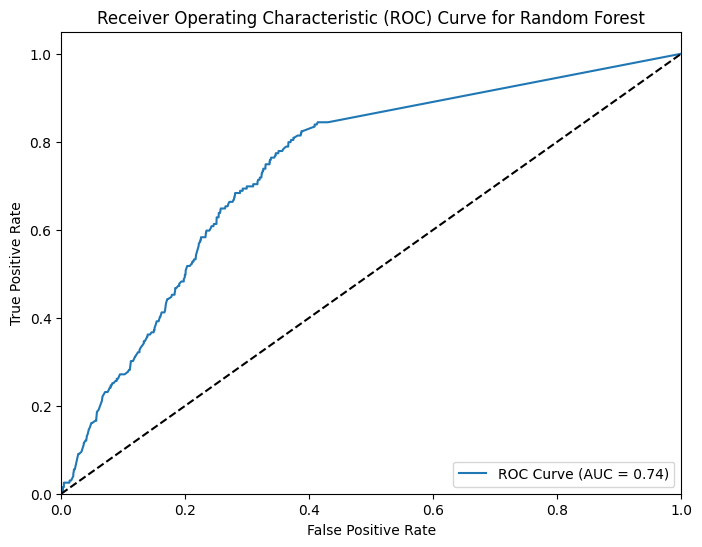

In [ ]:
# Model 2: Random Forest
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_resampled, y_resampled)

# Evaluation
# Make predictions on the validation data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# Calculate F1 score
f1 = f1_score(y_val, y_pred)
print(f"F1 Score: {f1:.2f}")

# Calculate ROC curve
y_scores = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_scores)
print(f"ROC AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Hyperparameter tuning to improve performance

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Accuracy: 0.771
Precision: 0.141
Recall: 0.503
F1 Score: 0.221
ROC AUC: 0.742


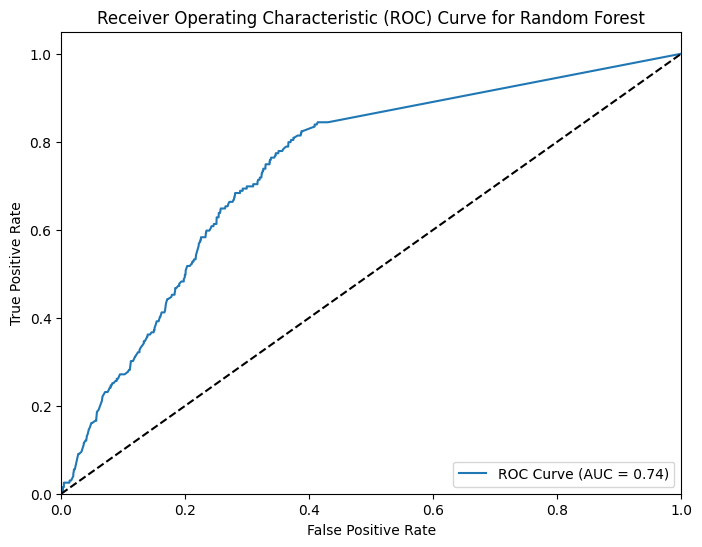

In [ ]:
# Use the best model for predictions
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.3f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.3f}")

# Calculate ROC curve
y_scores = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_scores)
print(f"ROC AUC: {roc_auc:.3f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

#### SVM

In [ ]:
# Model 3: Support Vector Machine

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# model before hyperparameter tuning
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_resampled, y_resampled)

svm_model_pred = svm_model.predict(X_test)
svm_model_prob = svm_model.predict_proba(X_test)[:, 1]

# metrics
accuracy_svm = accuracy_score(y_test, svm_model_pred)
print("Accuracy:", accuracy_svm)

precision_svm = precision_score(y_test, svm_model_pred)
print("Precision:", precision_svm)

recall_svm = recall_score(y_test, svm_model_pred)
print("Recall:", recall_svm)

f1_svm = f1_score(y_test, svm_model_pred)
print("F1 Score:", f1_svm)

roc_auc_svm = roc_auc_score(y_test, svm_model_prob)
print(f"ROC AUC:", roc_auc_svm)

Accuracy: 0.8317120622568094
Precision: 0.08115183246073299
Recall: 0.15577889447236182
F1 Score: 0.10671256454388986
ROC AUC: 0.5245264450502077


In [ ]:
# SVM Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf', 'sigmoid']}
svm_clf = SVC(probability=True)
grid_svc = GridSearchCV(svm_clf, param_grid, refit=True, verbose=2)
grid_svc.fit(X_resampled, y_resampled)

# print best parameter after tuning
best_svm_model = grid_svc.best_estimator_
best_svm_params = grid_svc.best_params_
print(best_svm_params)
print(best_svm_model)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  15.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  16.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  17.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  16.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  15.7s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   7.5s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  10.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   9.6s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   7.6s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   9.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  14.2s
[CV] END .......................C=0.1, gamma=0.

In [ ]:
# print best parameter after tuning
print(best_svm_params)
print(best_svm_model)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [ ]:
# metrics for tuned model

svc_y_pred = grid_svc.predict(X_test)

accuracy = accuracy_score(y_test, svc_y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, svc_y_pred)
print("Precision:", precision)

recall = recall_score(y_test, svc_y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, svc_y_pred)
print("F1 Score:", f1)

svc_y_prob = best_svm_model.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, svc_y_prob)
print(f"ROC AUC:", roc_auc_svm)

print(classification_report(y_test, svc_y_pred))

Accuracy: 0.8826199740596627
Precision: 0.1673469387755102
Recall: 0.20603015075376885
F1 Score: 0.18468468468468469
ROC AUC: 0.5676597894150126
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2885
           1       0.17      0.21      0.18       199

    accuracy                           0.88      3084
   macro avg       0.56      0.57      0.56      3084
weighted avg       0.89      0.88      0.89      3084



#### XGBoost

In [53]:
# Model 4: XGBoost
from xgboost import XGBClassifier

# Training a completely untuned model

model = XGBClassifier(
    objective='binary:logistic',
    nthread=4,
    seed=42
)
model.fit(X_resampled, y_resampled)
model

predictions = model.predict(X_test)

xg_accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of untuned model        : {round(xg_accuracy, 3)}')

xg_precision = precision_score(y_test, predictions)
print(f'Precision of untuned model       : {round(xg_precision, 3)}')

xg_recall = recall_score(y_test, predictions)
print(f'Recall of untuned model          : {round(xg_recall, 3)}')

xg_f1 = f1_score(y_test, predictions)
print(f'F1 Score of untuned model        : {round(xg_f1, 3)}')

xg_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC score of untuned model   : {round(xg_roc, 3)}')

Accuracy of untuned model        : 0.741
Precision of untuned model       : 0.14
Recall of untuned model          : 0.588
F1 Score of untuned model        : 0.227
ROC-AUC score of untuned model   : 0.774


In [55]:
# Tuning hyperparameters with a grid search
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(
    nthread=4,
    seed=42
)

hyperparams = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01]
}

# hyperparams = {
#     'max_depth': range(2, 10, 1),
#     'n_estimators': range(60, 220, 40),
#     'learning_rate': [0.1, 0.05, 0.01],
#     'gamma': [i/10.0 for i in range(0,5)],
#     'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100],
#     'min_child_weight': [6,8,10,12]
# }

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=hyperparams,
    scoring='roc_auc',
    n_jobs=10,
    cv=10,
    verbose=True
)

grid_search.fit(X_resampled, y_resampled)

grid_search.best_estimator_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)

In [56]:
# Evaluating hyperparameter tuned model
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score, roc_auc_score

tuned_model = grid_search.best_estimator_
print(grid_search.best_params_)

predictions = tuned_model.predict(X_test)

xg_accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of tuned model        : {round(xg_accuracy, 3)}')

xg_precision = precision_score(y_test, predictions)
print(f'Precision of tuned model       : {round(xg_precision, 3)}')

xg_recall = recall_score(y_test, predictions)
print(f'Recall of tuned model          : {round(xg_recall, 3)}')

xg_f1 = f1_score(y_test, predictions)
print(f'F1 Score of tuned model        : {round(xg_f1, 3)}')

xg_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC score of tuned model   : {round(xg_roc, 3)}')

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}
Accuracy of tuned model        : 0.758
Precision of tuned model       : 0.148
Recall of tuned model          : 0.578
F1 Score of tuned model        : 0.235
ROC-AUC score of tuned model   : 0.774


#### Logreg

In [58]:
# Model 5: Logistic Regression
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#base model logreg
base_logreg = LogisticRegression()
base_logreg.fit(X_resampled, y_resampled)

base_logreg_pred = base_logreg.predict(X_test)

# metrics
base_logreg_accuracy = accuracy_score(y_test, base_logreg_pred)
print("Accuracy:", base_logreg_accuracy)

base_logreg_precision = precision_score(y_test, base_logreg_pred)
print("Precision:", base_logreg_precision)

base_logreg_recall = recall_score(y_test, base_logreg_pred)
print("Recall:", base_logreg_recall)

base_logreg_f1 = f1_score(y_test, base_logreg_pred)
print("F1 Score:", base_logreg_f1)

Accuracy: 0.6108949416342413
Precision: 0.13705583756345177
Recall: 0.949748743718593
F1 Score: 0.2395437262357414


In [ ]:
#Logreg

# Hyperparameter tuning
logreg_param = {'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 3, 8),
                'max_iter': np.arange[4000, 6000, 1000], 'solver': ['liblinear']}

# Build the model
logreg = LogisticRegression()
logreg_gridsearch = GridSearchCV(logreg, logreg_param, cv=5)
logreg_gridsearch.fit(X_resampled, y_resampled.values.ravel())

# Find the best hyperparameters
print('Best hyperparameters:', logreg_gridsearch.best_params_)

Best hyperparameters: {'C': 0.1, 'max_iter': 6000, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score, roc_auc_score
metrics = ['f1-score','Accuracy','Recall','Precision','ROC-AUC']

best_logreg = logreg_gridsearch.best_estimator_
logreg_pred = best_logreg.predict(X_test)
logreg_probs = best_logreg.predict_proba(X_test)[:,1]

logreg_f1, logreg_accuracy = f1_score(y_test,logreg_pred), accuracy_score(y_test,logreg_pred)
logreg_recall, logreg_precision = recall_score(y_test,logreg_pred), precision_score(y_test,logreg_pred)
logreg_auc = roc_auc_score(y_test,logreg_probs)

logreg_metrics = pd.DataFrame([logreg_f1, logreg_accuracy, logreg_recall, logreg_precision, logreg_auc],
                              index = metrics)
logreg_metrics

,0
f1-score,0.231969
Accuracy,0.744488
Recall,0.597990
Precision,0.143894
ROC-AUC,0.784800


#### KNN

In [59]:
# Model 6: KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#base model KNN
base_knn = KNeighborsClassifier()
base_knn.fit(X_resampled, y_resampled)

base_knn_pred = base_knn.predict(X_test)

# metrics
base_knn_accuracy = accuracy_score(y_test, base_knn_pred)
print("Accuracy:", base_knn_accuracy)

base_knn_precision = precision_score(y_test, base_knn_pred)
print("Precision:", base_knn_precision)

base_knn_recall = recall_score(y_test, base_knn_pred)
print("Recall:", base_knn_recall)

base_knn_f1 = f1_score(y_test, base_knn_pred)
print("F1 Score:", base_knn_f1)

Accuracy: 0.9036964980544747
Precision: 0.15
Recall: 0.10552763819095477
F1 Score: 0.12389380530973451


In [64]:
#KNN
# Hyperparameter tuning
knn_param = {
    'n_neighbors': [5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Build Model
knn_classifier = KNeighborsClassifier()
knn_gridsearch = GridSearchCV(knn_classifier, knn_param, cv=5)
knn_gridsearch.fit(X_resampled, y_resampled.values.ravel())

# Find the best hyperparameters
print('Best hyperparameters:', knn_gridsearch.best_params_)

Best hyperparameters: {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}


In [65]:
metrics = ['f1-score','Accuracy','Recall','Precision','ROC-AUC']

best_knn = knn_gridsearch.best_estimator_
knn_pred = best_knn.predict(X_test)
knn_probs = best_knn.predict_proba(X_test)[:,1]

knn_f1, knn_accuracy = f1_score(y_test, knn_pred), accuracy_score(y_test, knn_pred)
knn_recall, knn_precision = recall_score(y_test, knn_pred), precision_score(y_test, knn_pred)
knn_auc = roc_auc_score(y_test, knn_probs)

knn_metrics = pd.DataFrame([knn_f1, knn_accuracy, knn_recall, knn_precision, knn_auc],
                              index = metrics)
knn_metrics

,0
f1-score,0.176072
Accuracy,0.881647
Recall,0.195980
Precision,0.159836
ROC-AUC,0.710194


### Evaluating Local Information Explanations for Each Model with [LIME](https://lime-ml.readthedocs.io/en/latest/)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d4756c7cf31d476481ba792fe0f6e749b0dfc0c661c60bcbb06e10a2cc64fa0a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# preparation for neural network creation
X_resampled_np = X_resampled.values
y_resampled_np = y_resampled.values
X_val_np = X_val.values
y_val_np = y_val.values
X_test_np = X_test.values
y_test_np = y_test.values
best_learning_rate = 0.001
best_dropout_rate = 0.2
best_num_neuron = 128
best_num_layer = 1
best_batch_size = 32

tuned_nn = Sequential()
tuned_nn.add(Dense(best_num_neuron, input_dim=X_resampled_np.shape[1], activation='relu'))
tuned_nn.add(Dropout(best_dropout_rate))

for _ in range(best_num_layer - 1):
    tuned_nn.add(Dense(best_num_neuron, activation='relu'))
    tuned_nn.add(Dropout(best_dropout_rate))

tuned_nn.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=best_learning_rate)

# hyperparameter tuned models
tuned_nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
tuned_logreg = LogisticRegression(C=0.1, max_iter=6000, penalty='l2', solver='liblinear')
tuned_knn = KNeighborsClassifier(n_neighbors=5, p=1, weights='distance')
tuned_rf = RandomForestClassifier(random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
tuned_xgb = XGBClassifier(objective='binary:logistic', nthread=4, seed=42, learning_rate=0.1, max_depth=9, n_estimators=180)
tuned_svm = SVC(probability=True, random_state=42, C=10, gamma=0.1, kernel='rbf')

# train hyperparameter tuned models
tuned_nn.fit(X_resampled_np, y_resampled_np, epochs=50, batch_size=best_batch_size, verbose=0)
tuned_logreg.fit(X_resampled, y_resampled)
tuned_knn.fit(X_resampled, y_resampled.values.ravel())
tuned_rf.fit(X_resampled, y_resampled)
tuned_xgb.fit(X_resampled, y_resampled)
tuned_svm.fit(X_resampled, y_resampled)

SVC(C=10, gamma=0.1, probability=True, random_state=42)


===== LIME Results for Logistic Regression =====
Observation #      = 3
Probability(Fraud) = 0.6736549347416865
True class         = 1


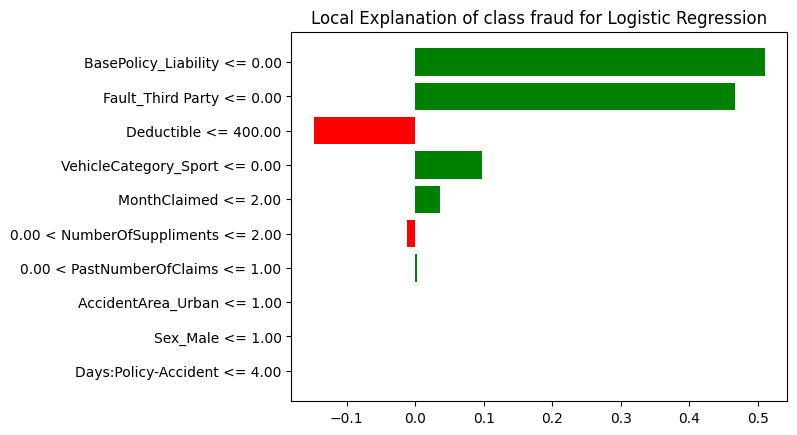


===== LIME Results for KNN =====
Observation #      = 3
Probability(Fraud) = 0.4
True class         = 1


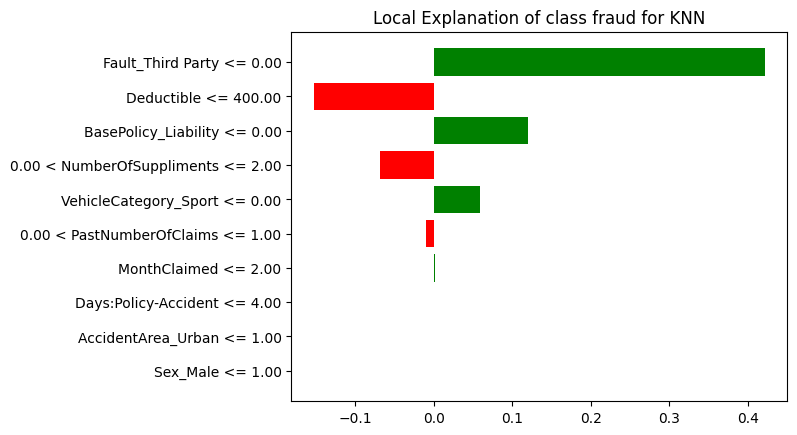


===== LIME Results for Random Forest =====
Observation #      = 3
Probability(Fraud) = 0.7668456056010133
True class         = 1


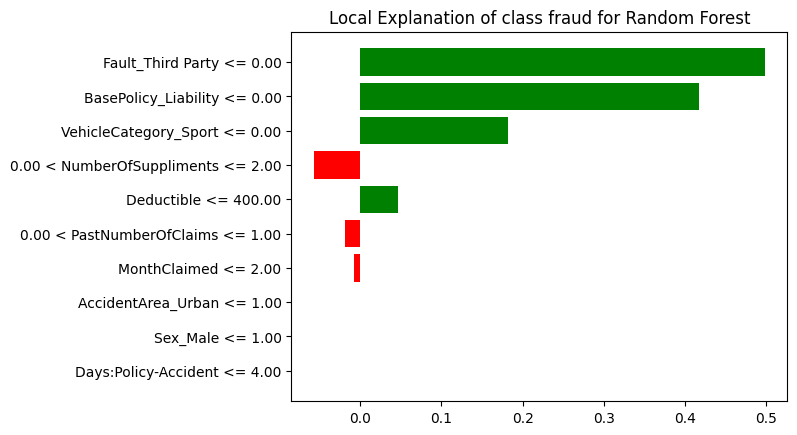


===== LIME Results for XGBoost =====
Observation #      = 3
Probability(Fraud) = 0.7858683
True class         = 1


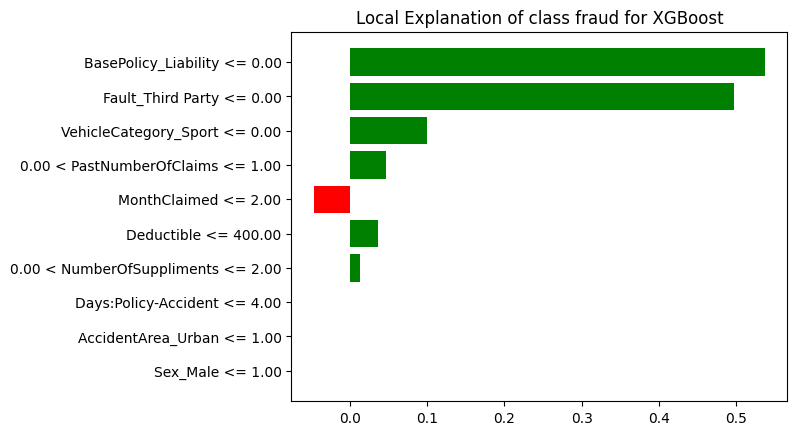


===== LIME Results for SVM =====
Observation #      = 3
Probability(Fraud) = 0.7865389528493502
True class         = 1


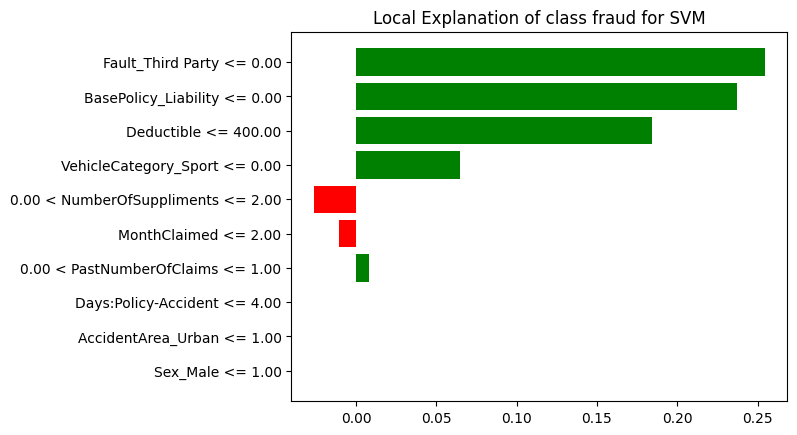

In [ ]:
tuned_models = {
    'Neural Network': tuned_nn,
    'Logistic Regression': tuned_logreg,
    'KNN': tuned_knn,
    'Random Forest': tuned_rf,
    'XGBoost': tuned_xgb,
    'SVM': tuned_svm
}

explainer = LimeTabularExplainer(
    X_resampled.values,
    feature_names=X_resampled.columns,
    class_names = ['normal', 'fraud'],
    mode='classification'
)

explainer_nn = LimeTabularExplainer(
    X_resampled.values,
    feature_names=X_resampled.columns,
    class_names = ['normal', 'fraud'],
    mode='classification'
)

idx = 3
for _name, _model in tuned_models.items():

    if _name == 'Neural Network':
        continue

        def predict_classes(X):
            arr1 = _model.predict(X)
            anon_fn = lambda f: np.append(f, 1 - f[0])
            return anon_fn(X)

        exp = explainer_nn.explain_instance(
            X_resampled.values[idx],
            predict_classes,
            num_features = 10
        )
        prob_fraud = _model.predict(X_resampled)[idx]

    else:
        exp = explainer.explain_instance(
            X_resampled.values[idx],
            _model.predict_proba,
            num_features = X_resampled.iloc[idx,:].size
        )
        prob_fraud = _model.predict_proba(X_resampled.values)[idx][1]

    print(f'\n===== LIME Results for {_name} =====')
    print('Observation #      = %d' % idx)
    print('Probability(Fraud) =', prob_fraud)
    print('True class         = %s' % y_train[idx])

    exp.as_pyplot_figure()
    plt.title(f'Local Explanation of class fraud for {_name}')
    plt.show()